In [108]:
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [54]:
# Read in data
data = pd.read_csv('../data/features/merged.csv')

In [55]:
# Read in beat boundaries
beats_gdf = gp.read_file('../data/geographies/Boundaries - Police Beats (current).geojson')
beats_gdf.drop(['beat'], axis=1, inplace=True)
beats_gdf.columns = ['BEAT', 'DISTRICT', 'SECTOR', 'geometry']

In [56]:
beats_gdf.shape

(277, 4)

In [57]:
beats_gdf['BEAT'] = beats_gdf['BEAT'].astype(int)

### Data cleaning/prep

In [58]:
# Look at data by year
data['YEAR'].value_counts()

2019    253
2016    249
2017    241
2018    236
Name: YEAR, dtype: int64

In [111]:
data.columns

Index(['BEAT', 'YEAR', 'COMPLAINTS_POLICE_SHOOTING',
       'COMPLAINTS_COMPLAINANT_RACE_BlackorAfricanAmerican',
       'COMPLAINTS_COMPLAINANT_RACE_Hispanic,Latino,orSpanishOrigin',
       'COMPLAINTS_COMPLAINANT_RACE_White',
       'COMPLAINTS_COMPLAINANT_RACE_Other', 'CRIME_Total', 'CRIME_Arrest',
       'CRIME_Domestic', 'ISR_CNT_ISR_TOTAL', 'ISR_CNT_ISR_BLACK',
       'ISR_CNT_ISR_WHITE', 'ISR_CNT_ISR_HISPANIC', 'UOF_DISTRICT',
       'UOF_TOTAL_COUNT', 'UOF_HISPANIC', 'UOF_BLACK', 'UOF_WHITE',
       'CENSUS_beat', 'CENSUS_district', 'CENSUS_sector', 'CENSUS_Total Pop',
       'CENSUS_White', 'CENSUS_Black', 'CENSUS_Hispanic',
       'CENSUS_Median Income'],
      dtype='object')

In [59]:
# TODO: UNDO
data_19 = data[data['YEAR'] == 2019]

In [60]:
# Confirm one obs per beat
data_19[['BEAT', 'YEAR']].value_counts().mean()

1.0

In [61]:
drop_cols = ['YEAR','UOF_DISTRICT', 'CENSUS_beat', 'CENSUS_district', 
             'CENSUS_sector']
data_19.drop(drop_cols, axis=1, inplace=True)

/mnt/c/Users/jbleh/Desktop/UChicago/wsl/git/ml_project/env/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
data_19.columns

Index(['BEAT', 'COMPLAINTS_POLICE_SHOOTING',
       'COMPLAINTS_COMPLAINANT_RACE_BlackorAfricanAmerican',
       'COMPLAINTS_COMPLAINANT_RACE_Hispanic,Latino,orSpanishOrigin',
       'COMPLAINTS_COMPLAINANT_RACE_White',
       'COMPLAINTS_COMPLAINANT_RACE_Other', 'CRIME_Total', 'CRIME_Arrest',
       'CRIME_Domestic', 'ISR_CNT_ISR_TOTAL', 'ISR_CNT_ISR_BLACK',
       'ISR_CNT_ISR_WHITE', 'ISR_CNT_ISR_HISPANIC', 'UOF_TOTAL_COUNT',
       'UOF_HISPANIC', 'UOF_BLACK', 'UOF_WHITE', 'CENSUS_Total Pop',
       'CENSUS_White', 'CENSUS_Black', 'CENSUS_Hispanic',
       'CENSUS_Median Income'],
      dtype='object')

In [64]:
# Add total complaint col
data_19['COMPLAINTS_TOTAL'] = data_19['COMPLAINTS_COMPLAINANT_RACE_BlackorAfricanAmerican'] + data_19[
                                'COMPLAINTS_COMPLAINANT_RACE_Hispanic,Latino,orSpanishOrigin'] + data_19[
                                'COMPLAINTS_COMPLAINANT_RACE_White'] + data_19[
                                'COMPLAINTS_COMPLAINANT_RACE_Other']



/mnt/c/Users/jbleh/Desktop/UChicago/wsl/git/ml_project/env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [65]:
data_19.columns

Index(['BEAT', 'COMPLAINTS_POLICE_SHOOTING',
       'COMPLAINTS_COMPLAINANT_RACE_BlackorAfricanAmerican',
       'COMPLAINTS_COMPLAINANT_RACE_Hispanic,Latino,orSpanishOrigin',
       'COMPLAINTS_COMPLAINANT_RACE_White',
       'COMPLAINTS_COMPLAINANT_RACE_Other', 'CRIME_Total', 'CRIME_Arrest',
       'CRIME_Domestic', 'ISR_CNT_ISR_TOTAL', 'ISR_CNT_ISR_BLACK',
       'ISR_CNT_ISR_WHITE', 'ISR_CNT_ISR_HISPANIC', 'UOF_TOTAL_COUNT',
       'UOF_HISPANIC', 'UOF_BLACK', 'UOF_WHITE', 'CENSUS_Total Pop',
       'CENSUS_White', 'CENSUS_Black', 'CENSUS_Hispanic',
       'CENSUS_Median Income', 'COMPLAINTS_TOTAL'],
      dtype='object')

In [74]:
data_19.set_index('BEAT', inplace=True)

In [75]:
data_19

,COMPLAINTS_POLICE_SHOOTING,COMPLAINTS_COMPLAINANT_RACE_BlackorAfricanAmerican,"COMPLAINTS_COMPLAINANT_RACE_Hispanic,Latino,orSpanishOrigin",COMPLAINTS_COMPLAINANT_RACE_White,COMPLAINTS_COMPLAINANT_RACE_Other,CRIME_Total,CRIME_Arrest,CRIME_Domestic,ISR_CNT_ISR_TOTAL,ISR_CNT_ISR_BLACK,...,UOF_TOTAL_COUNT,UOF_HISPANIC,UOF_BLACK,UOF_WHITE,CENSUS_Total Pop,CENSUS_White,CENSUS_Black,CENSUS_Hispanic,CENSUS_Median Income,COMPLAINTS_TOTAL
BEAT,,,,,,,,,,,,,,,,,,,,,
111,0.0,2,0,0,4,2498,603,64,929,665.0,...,16,3,11,2,2303.898896,0.729601,0.039184,0.071100,98843.500000,6
112,0.0,3,0,0,2,2169,337,27,493,393.0,...,26,0,25,1,981.205008,0.686383,0.081220,0.092135,125252.333333,5
113,0.0,3,0,0,0,1051,206,23,708,568.0,...,18,3,15,0,951.687016,0.621650,0.103919,0.094872,121779.000000,3
114,0.0,2,1,0,4,1208,129,35,490,224.0,...,25,8,8,8,14944.268765,0.730854,0.057134,0.082221,118957.454545,7
122,0.0,0,0,0,2,1917,158,48,460,257.0,...,7,1,5,1,4709.852385,0.600666,0.104765,0.102024,110197.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,0.0,3,0,0,0,690,150,140,478,409.0,...,34,3,30,0,6433.331278,0.065067,0.827930,0.153118,41339.266667,3
2532,0.0,4,0,0,4,1026,219,273,767,639.0,...,17,2,13,0,9679.049179,0.081809,0.758928,0.223511,42026.200000,8
2533,0.0,2,1,0,0,1604,464,193,727,429.0,...,25,0,25,0,11233.261040,0.261702,0.394076,0.562104,41899.000000,3


### K MEANS

In [78]:
def get_kmeans(df, k, random_state=0):
    cluster = KMeans(n_clusters=k, random_state=random_state )
    cluster.fit(df.values)
    return cluster

In [79]:
def plot_cluster(cluster, df, gdf):
    cluster_df = pd.DataFrame({'BEAT':df.index, 'cluster':cluster.labels_})
    cluster_df = cluster_df.merge(df, on='BEAT')
    gdf.merge(cluster_df, on='BEAT').plot(column='cluster')
    n = cluster_df['cluster'].nunique()
    plt.title(f'{n} clusters')
    plt.xticks([])
    plt.yticks([])

### Plot by k

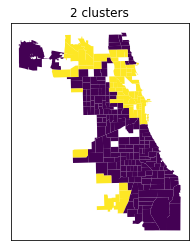

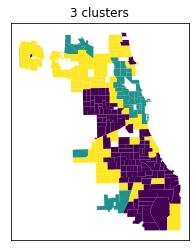

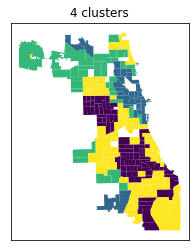

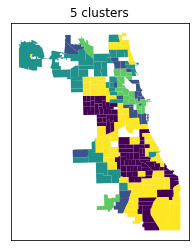

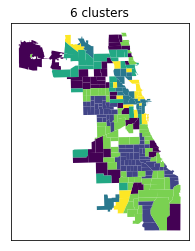

In [80]:
for k in [2,3,4,5,6]:
    cluster = get_kmeans(data_19, k, random_state=0)
    plot_cluster(cluster, data_19, beats_gdf)

### Plot for different subsets of data

In [81]:
data_19.columns

Index(['COMPLAINTS_POLICE_SHOOTING',
       'COMPLAINTS_COMPLAINANT_RACE_BlackorAfricanAmerican',
       'COMPLAINTS_COMPLAINANT_RACE_Hispanic,Latino,orSpanishOrigin',
       'COMPLAINTS_COMPLAINANT_RACE_White',
       'COMPLAINTS_COMPLAINANT_RACE_Other', 'CRIME_Total', 'CRIME_Arrest',
       'CRIME_Domestic', 'ISR_CNT_ISR_TOTAL', 'ISR_CNT_ISR_BLACK',
       'ISR_CNT_ISR_WHITE', 'ISR_CNT_ISR_HISPANIC', 'UOF_TOTAL_COUNT',
       'UOF_HISPANIC', 'UOF_BLACK', 'UOF_WHITE', 'CENSUS_Total Pop',
       'CENSUS_White', 'CENSUS_Black', 'CENSUS_Hispanic',
       'CENSUS_Median Income', 'COMPLAINTS_TOTAL'],
      dtype='object')

In [82]:
data_no_demo = data_19[['COMPLAINTS_TOTAL', 'CRIME_Total', 'ISR_CNT_ISR_TOTAL', 'UOF_TOTAL_COUNT']]

,COMPLAINTS_TOTAL,CRIME_Total,ISR_CNT_ISR_TOTAL,UOF_TOTAL_COUNT
BEAT,,,,
111,6,2498,929,16
112,5,2169,493,26
113,3,1051,708,18
114,7,1208,490,25
122,2,1917,460,7
...,...,...,...,...
2531,3,690,478,34
2532,8,1026,767,17
2533,3,1604,727,25


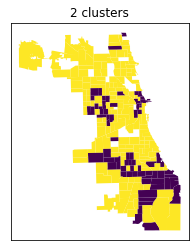

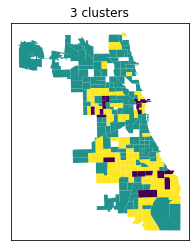

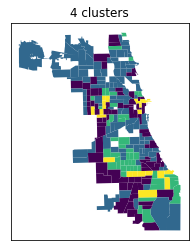

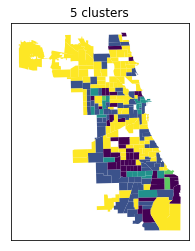

In [86]:
for n in [2,3,4,5]:
    cluster = get_kmeans(data_no_demo, k=n, random_state=0)
    plot_cluster(cluster, data_no_demo, beats_gdf)

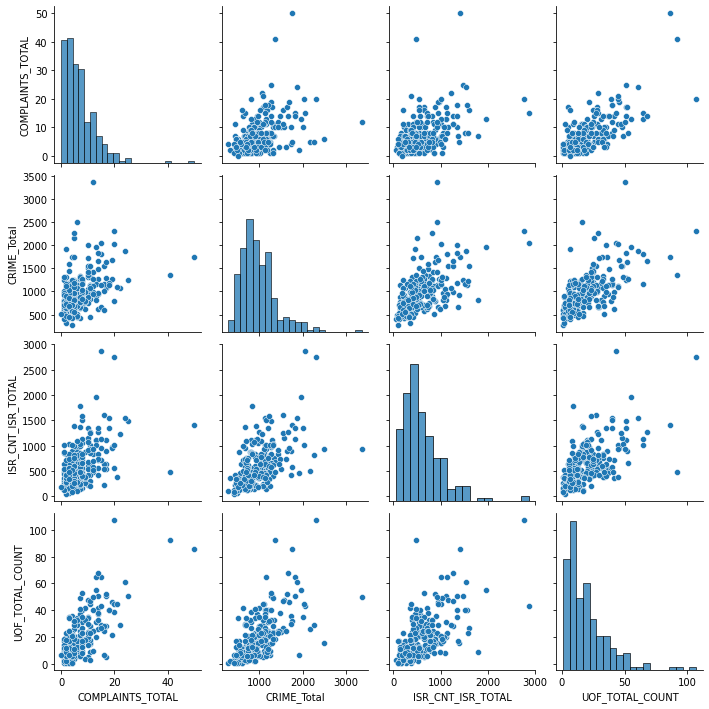

In [110]:
sns.pairplot(data = data_no_demo)

In [112]:
data_19.columns

Index(['COMPLAINTS_POLICE_SHOOTING',
       'COMPLAINTS_COMPLAINANT_RACE_BlackorAfricanAmerican',
       'COMPLAINTS_COMPLAINANT_RACE_Hispanic,Latino,orSpanishOrigin',
       'COMPLAINTS_COMPLAINANT_RACE_White',
       'COMPLAINTS_COMPLAINANT_RACE_Other', 'CRIME_Total', 'CRIME_Arrest',
       'CRIME_Domestic', 'ISR_CNT_ISR_TOTAL', 'ISR_CNT_ISR_BLACK',
       'ISR_CNT_ISR_WHITE', 'ISR_CNT_ISR_HISPANIC', 'UOF_TOTAL_COUNT',
       'UOF_HISPANIC', 'UOF_BLACK', 'UOF_WHITE', 'CENSUS_Total Pop',
       'CENSUS_White', 'CENSUS_Black', 'CENSUS_Hispanic',
       'CENSUS_Median Income', 'COMPLAINTS_TOTAL'],
      dtype='object')

In [122]:
data_19['CRIME_PCT_ARREST'] = data_19['CRIME_Arrest'] / data_19['CRIME_Total']

/mnt/c/Users/jbleh/Desktop/UChicago/wsl/git/ml_project/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/mnt/c/Users/jbleh/Desktop/UChicago/wsl/git/ml_project/env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


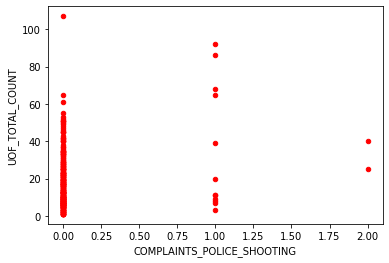

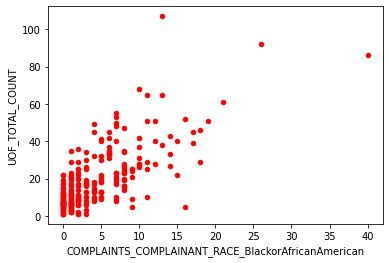

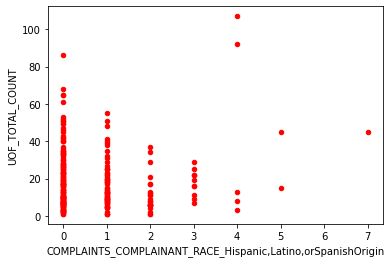

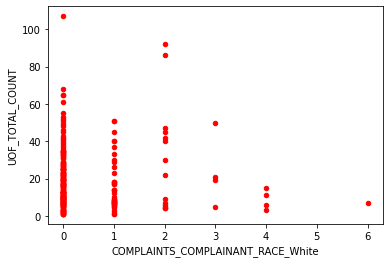

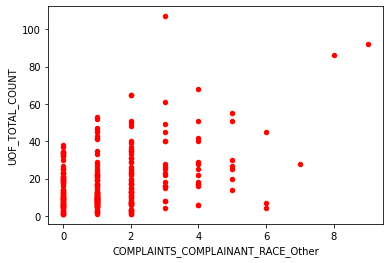

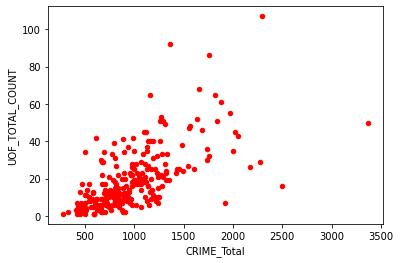

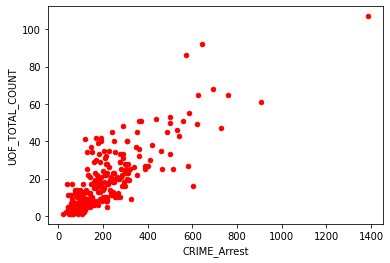

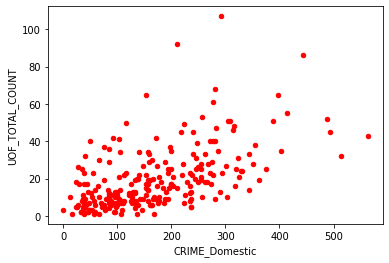

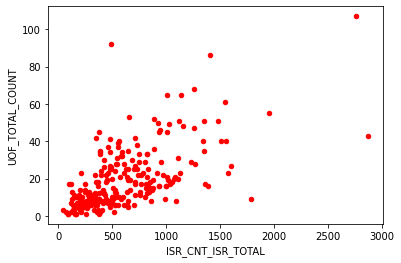

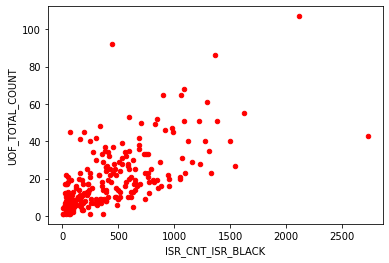

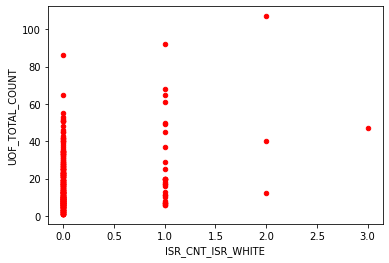

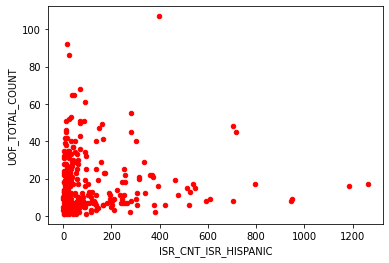

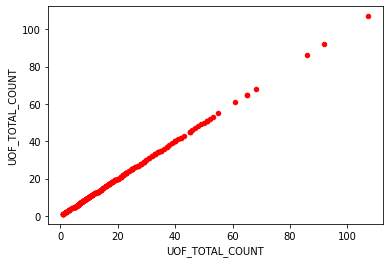

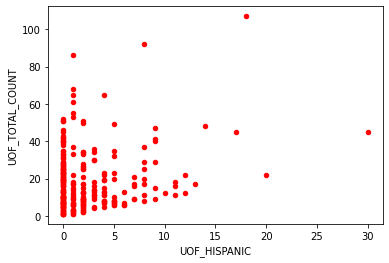

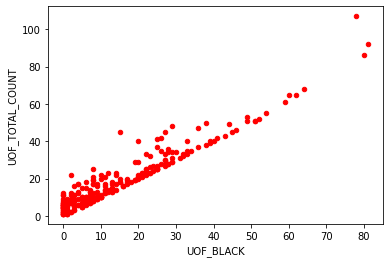

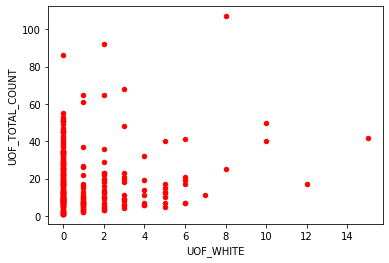

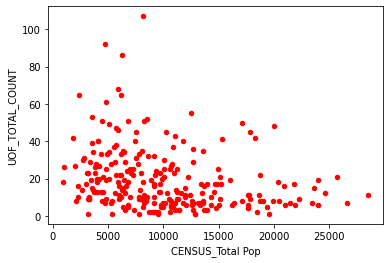

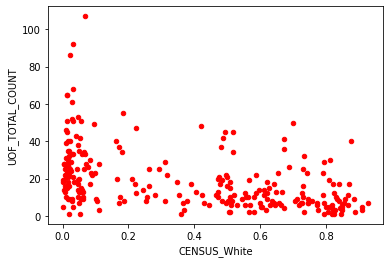

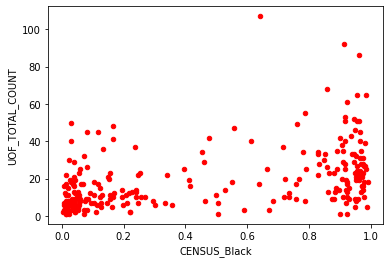

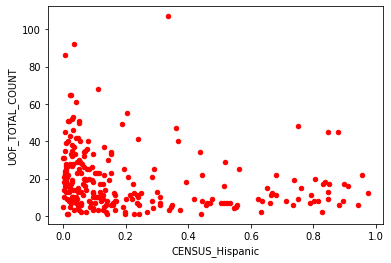

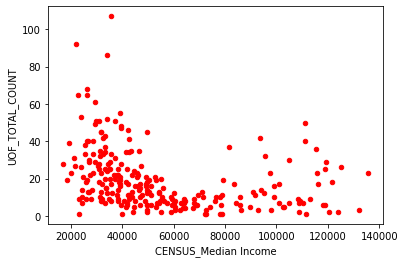

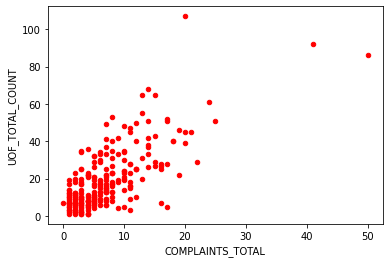

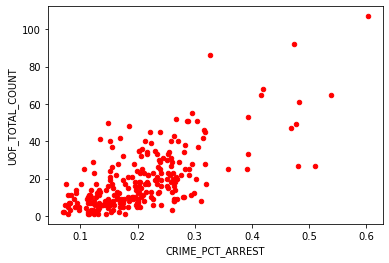

In [138]:
for yvar in ['UOF_TOTAL_COUNT']:
    for xvar in data_19.columns:
        data_19.plot(kind='scatter', x=xvar, y=yvar, color='red') 



<AxesSubplot:xlabel='CENSUS_Black', ylabel='UOF_TOTAL_COUNT'>

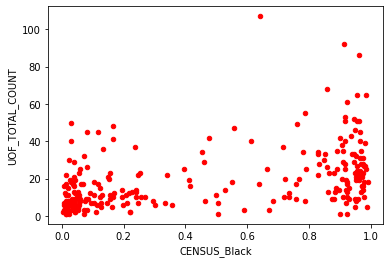

In [136]:
data_19.plot(kind='scatter', x='CENSUS_Black', y='UOF_TOTAL_COUNT', color='red') 


In [ ]:
data_19.plot(kind='scatter', x='CENSUS_Black', y='UOF_TOTAL_COUNT', color='red') 
